In [1201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1202]:
dataset_path = r"C:\Users\PC\Desktop\flight-dataset"

df =  pd.read_excel(dataset_path + r"\train.xlsx") 
df_train = pd.read_excel(dataset_path + r"\train.xlsx") 
df_test = pd.read_excel(dataset_path + r"\test.xlsx") 

In [1203]:
print(df_train.shape)
print(df_test.shape)


(10683, 11)
(2671, 10)


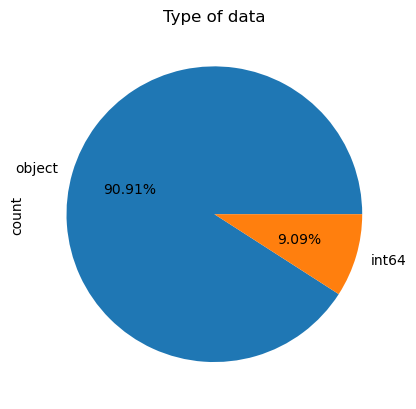

In [1204]:
df_train.dtypes.value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Type of data")
plt.show()

In [1205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1206]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [1207]:
df_train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


### Basic Observations:
1. There are 12 distinct airlines with "Jet Airways" as the most common one
2. Delhi is the most common popular of flight
3. Cochin is the most popular destination of flight
4. Most common route is DEL->BOM->COK

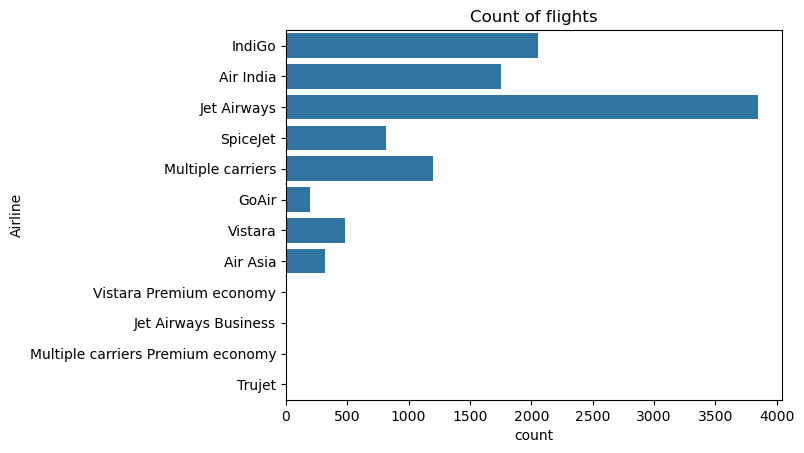

In [1209]:
plt.title("Count of flights")
sns.countplot(df_train['Airline'])
plt.show()

In [1210]:
airline_counts = df_train.groupby("Airline").size()
airline_percentage = np.round((airline_counts / airline_counts.sum()) * 100 , 2 )
airline_percentage.reset_index(name="Percentage").sort_values(by="Percentage" , ascending=False)

,Airline,Percentage
4,Jet Airways,36.03
3,IndiGo,19.22
1,Air India,16.40
6,Multiple carriers,11.20
8,SpiceJet,7.66
10,Vistara,4.48
0,Air Asia,2.99
2,GoAir,1.82
7,Multiple carriers Premium economy,0.12
5,Jet Airways Business,0.06


In [1211]:
df_train['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [1212]:
from sklearn.preprocessing import OneHotEncoder

def preprocess_date_of_flight(df):
    df['day_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[0] ).astype(int)
    df['month_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[1] ).astype(int)
    df['year_of_flight'] = df['Date_of_Journey'].apply( lambda x : x.split("/")[2] ).astype(int)

    return df

def preprocess_flight_time(df):
    df['Dep_Time'] = df['Dep_Time'].apply( lambda time : (int(time.split(":")[0]) * 60 ) + int(time.split(":")[1]) )
    df['Arrival_Time'] = df['Arrival_Time'].str.extract(r'(\d{2}:\d{2})')
    df['Arrival_Time'] = df['Arrival_Time'].apply( lambda time : (int(time.split(":")[0]) * 60 ) + int(time.split(":")[1]) )
    df[['Duration_hours' , 'Duration_minutes']] = df['Duration'].str.extract(r'(\d+)h?\s*(\d+)?m?')
    df['Duration_minutes'] = df['Duration_minutes'].fillna(0)
    df['Duration'] = df['Duration_hours'].astype(int) * 60 + df['Duration_minutes'].astype(int)
    df.drop(['Duration_hours' , 'Duration_minutes'] , inplace=True , axis=1)
    
    return df

def preprocess_stops(df):
    df['Total_Stops'] = df['Total_Stops'].replace({
        'non-stop' : 0,
        '1 stop' : 1,
        '2 stops': 2,
        '3 stops': 3,
        '4 stops': 4
    })

    return df

In [1213]:
df_train = preprocess_date_of_flight(df)
df_train = preprocess_flight_time(df)
df_train = preprocess_stops(df)

C:\Users\PC\AppData\Local\Temp\ipykernel_15692\2434886295.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


In [1214]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_flight,month_of_flight,year_of_flight
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,1340,70,170,0.0,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,795,445,2.0,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,565,265,1140,2.0,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1085,1410,325,1.0,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1010,1295,285,1.0,No info,13302,1,3,2019


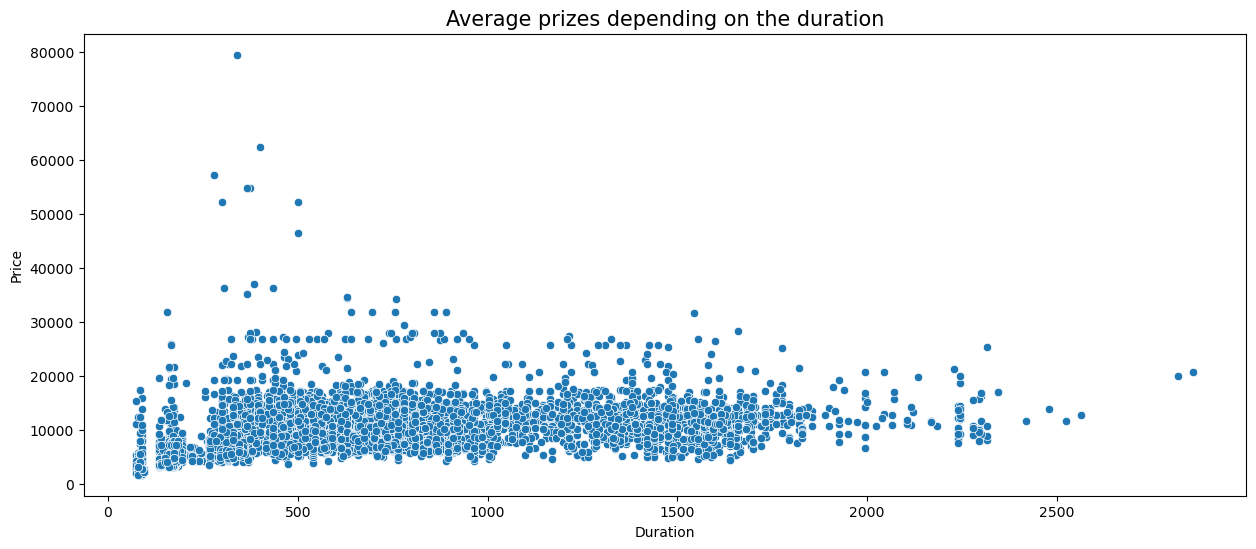

In [1215]:
plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="Duration", y="Price", data=df_train).set_title("Average prizes depending on the duration",fontsize=15)
plt.show()

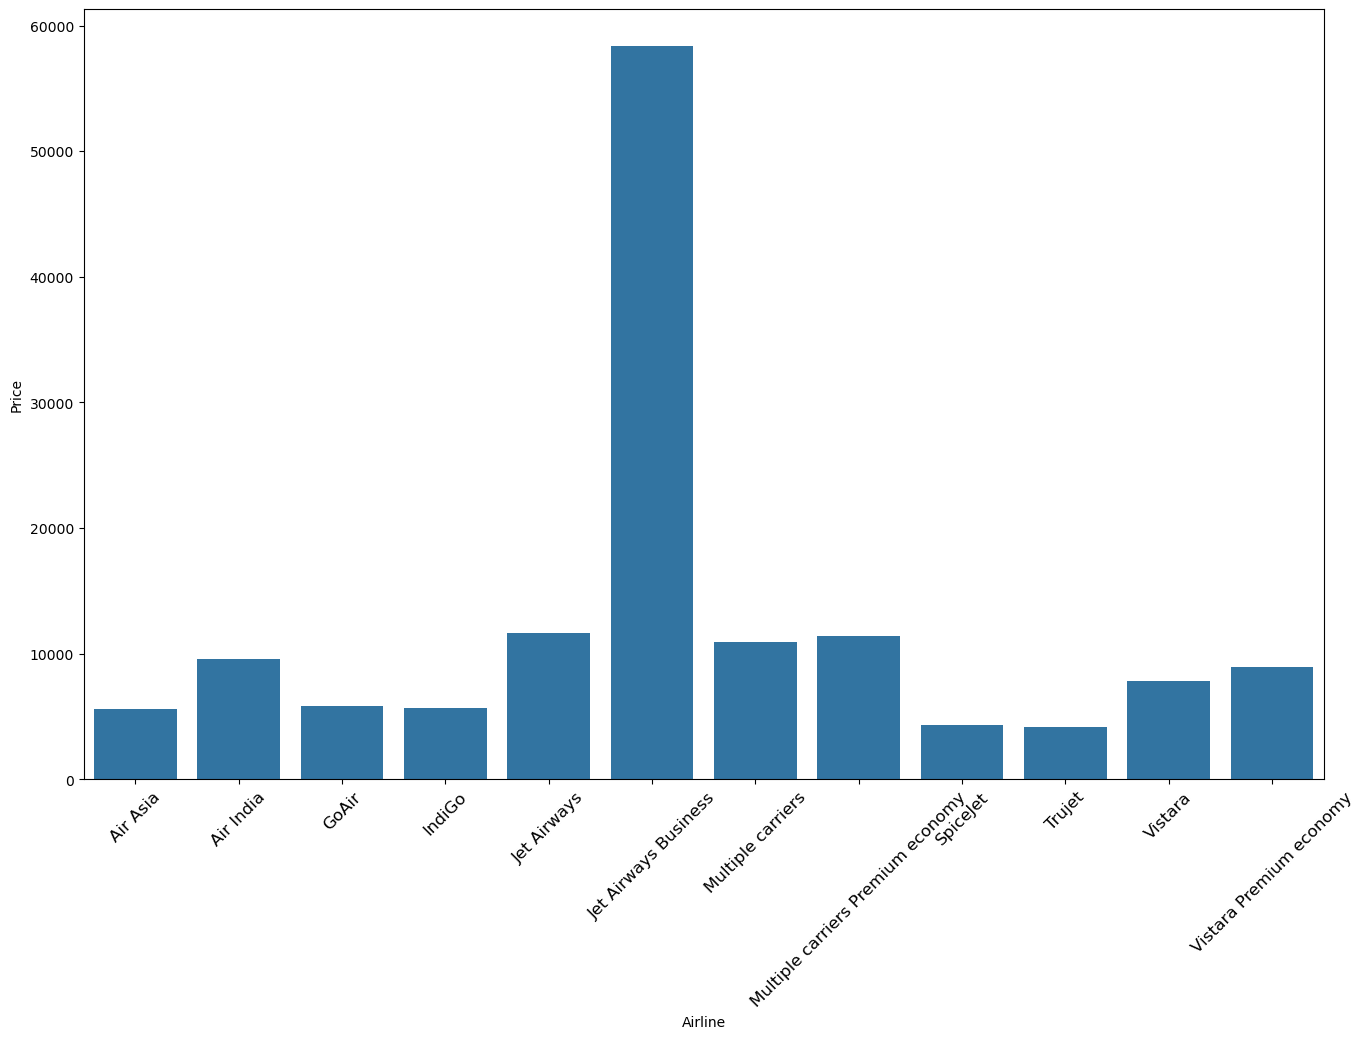

In [1231]:
df_temp = df_train.copy()
airline_price_grouped = df_temp.groupby(["Airline"])['Price'].mean(numeric_only=True).reset_index()
plt.figure( figsize=(16,10))
sns.barplot(x='Airline' , y='Price' , data=airline_price_grouped)
plt.xticks(fontsize=12, rotation=45)
plt.show()

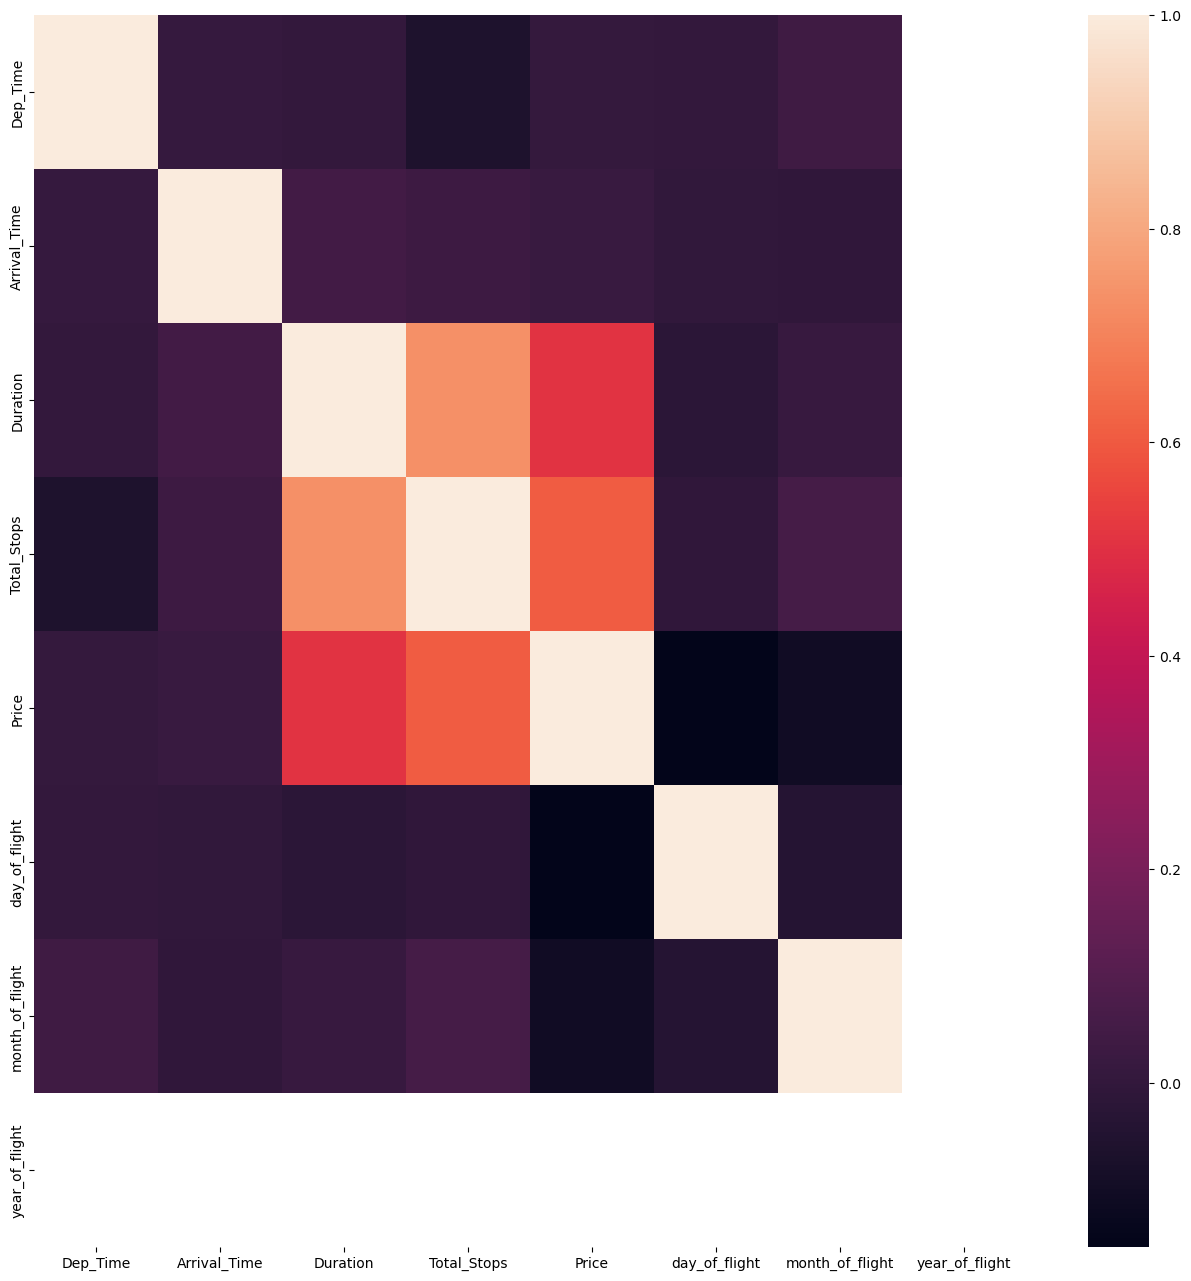

In [1243]:
plt.figure(figsize = (16,16))
sns.heatmap(df_train.select_dtypes(include=['number']).corr())
plt.show()


In [ ]:
sns.barplot(airline_price_grouped.index , airline_price_grouped)

In [ ]:
df_train.dtypes

In [ ]:
y_train = df_train.loc[ :  , 'Price']
df_train.drop(["Date_of_Journey" ,"Route" , "Price"] , inplace=True , axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
    ('one_hot_encoding' , OneHotEncoder() , ["Source" , "Destination" , "Airline" , "Additional_Info"] )
] , remainder="passthrough")

X_transformed = ct.fit_transform(df)

In [ ]:
X_transformed